In [4]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)
cf.go_offline();
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not shown")
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("amazon.csv")

In [6]:
df.tail

<bound method NDFrame.tail of       Unnamed: 0  reviewerName  overall  \
0              0           NaN        4   
1              1          0mie        5   
2              2           1K3        4   
3              3           1m2        5   
4              4  2&amp;1/2Men        5   
...          ...           ...      ...   
4911        4911            Zo        5   
4912        4912     Z S Liske        5   
4913        4913      Z Taylor        5   
4914        4914           Zza        5   
4915        4915         Aryan        5   

                                             reviewText  reviewTime  day_diff  \
0                                            No issues.  23-07-2014       138   
1     Purchased this for my device, it worked as adv...  25-10-2013       409   
2     it works as expected. I should have sprung for...  23-12-2012       715   
3     This think has worked out great.Had a diff. br...  21-11-2013       382   
4     Bought it with Retail Packaging, arrived l

In [3]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [4]:
df = df.sort_values("wilson_lower_bound", ascending=False)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [5]:
import pandas as pd
import numpy as np
 
def missing_values_analysis(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=True)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print("SHAPE".center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print("TYPES".center(82, '~'))
    print(df.dtypes)
    print("".center(82, '~'))
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(83, '~'))
    print(df.duplicated().sum())
    print("QUANTILES".center(82, '~'))
    try:
        quantile_cols = df.select_dtypes(include=np.number).columns
        print(df[quantile_cols].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]))
    except TypeError as e:
        print("Error calculating quantiles. Ensure all numeric columns contain numbers only.")
        print(e)
        
check_dataframe(df)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
Columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Missing Values  Ratio
reviewerName               1   0.02
reviewText                 1   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      overall  day_diff  helpful_yes  helpful_no  total_vote  \
0.00      1.0       1

In [6]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                                 'Classes': [dataframe[i].nunique() for i in dataframe.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending=False)
    nunique_df = nunique_df.reset_index(drop=True)
    return nunique_df

check_class(df)


,Variable,Classes
0,reviewText,4912
1,reviewerName,4594
2,reviewTime,690
3,day_diff,690
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


In [7]:
def categorical_variable_summary(df, column_name):
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Countplot', 'Percentage'),
        specs=[[{"type": "xy"}, {"type": "domain"}]]
    )
    
    fig.add_trace(
        go.Bar(
            y=df[column_name].value_counts().values.tolist(),
            x=[str(i) for i in df[column_name].value_counts().index],
            text=df[column_name].value_counts().values.tolist(),
            textfont=dict(size=14),
            name=column_name,
            textposition='auto',
            showlegend=False,
            marker=dict(color=constraints, line=dict(color='#DBE6EC', width=1))
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Pie(
            labels=df[column_name].value_counts().keys(),
            values=df[column_name].value_counts().values,
            textfont=dict(size=18),
            textposition='auto',
            showlegend=False,
            name=column_name,
            marker=dict(colors=constraints)
        ),
        row=1, col=2
    )

    fig.update_layout(
        title={'text': column_name, 'y': 0.9, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
        template='plotly_white'
    )
    
    iplot(fig)  



In [8]:
def categorical_variable_summary(df, column_name):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Countplot', 'Percentage'),
        specs=[[{"type": "xy"}, {"type": "domain"}]]
    )
    
    fig.add_trace(
        go.Bar(
            y=df[column_name].value_counts().values.tolist(),
            x=[str(i) for i in df[column_name].value_counts().index],
            text=df[column_name].value_counts().values.tolist(),
            textfont=dict(size=14),
            name=column_name,
            textposition='auto',
            showlegend=False,
            marker=dict(color=colors[:len(df[column_name].value_counts())], line=dict(color='#DBE6EC', width=1))
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Pie(
            labels=df[column_name].value_counts().keys(),
            values=df[column_name].value_counts().values,
            textfont=dict(size=18),
            textposition='auto',
            showlegend=False,
            name=column_name,
            marker=dict(colors=colors[:len(df[column_name].value_counts())])
        ),
        row=1, col=2
    )

    fig.update_layout(
        title={'text': column_name, 'y': 0.9, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
        template='plotly_white'
    )
    
    iplot(fig)

import plotly.graph_objects as go



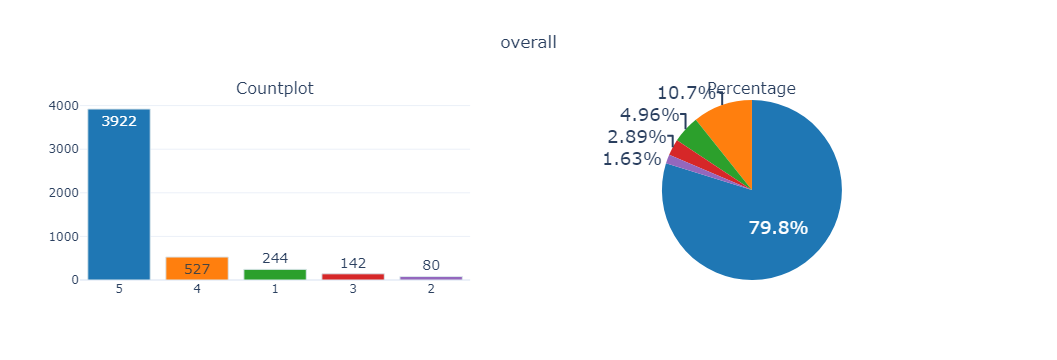

In [9]:
categorical_variable_summary(df, 'overall')

In [10]:
df.reviewText.head()

2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
4212    NOTE:  please read the last update (scroll to ...
317     If your card gets hot enough to be painful, it...
4672    Sandisk announcement of the first 128GB micro ...
Name: reviewText, dtype: object

In [11]:
review_example = df.reviewText[2031]
review_example

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [12]:
review_example = re.sub("[^a-zA-Z]",'', review_example)
review_example

'UPDATESomylovelywifeboughtmeaSamsungGalaxyTabforFathersDayandIvebeenlovingiteversinceJustasotherwithSamsungproductstheGalaxyTabhastheabilitytoaddamicroSDcardtoexpandthememoryonthedeviceSinceitsbeenoverayearIdecidedtodosomemoreresearchtoseeifSanDiskofferedanythingnewAsoftheirproductlineupformicroSDcardsfromworsttobestperformancewisearetheasfollowsSanDiskSanDiskUltraSanDiskUltraPLUSSanDiskExtremeSanDiskExtremePLUSSanDiskExtremePRONowthedifferencebetweenallofthesecardsaresimplythespeedinwhichyoucanreadwritedatatothecardYesthepublishedratingofmostallthesecardsexcepttheSanDiskregularareClassUHSIbutthatsjustaratingActualrealworldperformancedoesgetbetterwitheachmodelbutwithfastercardscomemoreexpensivepricesSinceAmazondoesntcarrytheUltraPLUSmodelofmicroSDcardIhadtododirectcomparisonsbetweentheSanDiskUltraExtremeandExtremePLUSAsmentionedinmyearlierreviewIpurchasedtheSanDiskUltraformyGalaxySMyquestionwasdidIwanttopayovermoreforacardthatisfasterthantheoneIalreadyownedOrIcouldpayalmostdoubletoget

In [13]:
# Converting the list to a single string before applying string methods
review_example_string = ' '.join(review_example).lower()
review_example_split = review_example_string.split()

# Displaying the lowercase string and split words
review_example_string, review_example_split


('u p d a t e s o m y l o v e l y w i f e b o u g h t m e a s a m s u n g g a l a x y t a b f o r f a t h e r s d a y a n d i v e b e e n l o v i n g i t e v e r s i n c e j u s t a s o t h e r w i t h s a m s u n g p r o d u c t s t h e g a l a x y t a b h a s t h e a b i l i t y t o a d d a m i c r o s d c a r d t o e x p a n d t h e m e m o r y o n t h e d e v i c e s i n c e i t s b e e n o v e r a y e a r i d e c i d e d t o d o s o m e m o r e r e s e a r c h t o s e e i f s a n d i s k o f f e r e d a n y t h i n g n e w a s o f t h e i r p r o d u c t l i n e u p f o r m i c r o s d c a r d s f r o m w o r s t t o b e s t p e r f o r m a n c e w i s e a r e t h e a s f o l l o w s s a n d i s k s a n d i s k u l t r a s a n d i s k u l t r a p l u s s a n d i s k e x t r e m e s a n d i s k e x t r e m e p l u s s a n d i s k e x t r e m e p r o n o w t h e d i f f e r e n c e b e t w e e n a l l o f t h e s e c a r d s a r e s i m p l y t h e s p e e d i n w h i c h y o u c a 

In [14]:
rt = lambda x: re.sub("[^a-zA-Z]", ' ',str(x))
df["reviewText"] = df["reviewText"].map(rt)

df["reviewText"] = df["reviewText"].str.lower()
df.head()


,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [15]:
!pip install vaderSentiment

In [16]:
!pip install textblob

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from textblob import TextBlob

sid = SentimentIntensityAnalyzer()


def get_vader_sentiment(text):
    score = sid.polarity_scores(text)
    if score['compound'] > 0:
        return 'Positive'
    elif score['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda x: pd.Series([TextBlob(x).sentiment.polarity, TextBlob(x).sentiment.subjectivity]))

df['sentiment'] = df['reviewText'].apply(get_vader_sentiment)

positive_data = df[df['sentiment'] == 'Positive'].nlargest(5, 'polarity')

categorical_variable_summary = df['sentiment'].value_counts()




In [18]:
print("Top 5 positive sentiment reviews:")
print(positive_data)

Top 5 positive sentiment reviews:
                    reviewerName  overall  \
2885  L. P. Nugaliyadda "Pramod"        5   
3872                Road Warrior        5   
3227              milie Sarrazin        5   
3605               peter Metcalf        5   
3407                         NEM        5   

                                             reviewText  reviewTime  day_diff  \
2885  superb  no complains what so ever  i bought th...  21-03-2014       262   
3872  i bought this for my gopro hero   and it perfo...  13-05-2013       574   
3227  works superbly with my microsoft surface rt  o...  15-02-2014       296   
3605                                            perfect  07-02-2014       304   
3407  excellent item for the price  class    is the ...  03-03-2013       645   

      helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
2885            1           0           1                   1   
3872            1           0           1                   1   
3227         

In [19]:
print("\nCategorical variable summary for sentiment:")
print(categorical_variable_summary)


Categorical variable summary for sentiment:
sentiment
Positive    3998
Negative     644
Neutral      273
Name: count, dtype: int64


In [ ]:
df